Import necssary libraries and modules

In [ ]:
from google.colab import drive
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score, precision_score, recall_score

Import training, validation and testing datasets

In [ ]:
drive.mount('/content/drive')

# file paths for the datasets
train_path = '/content/drive/MyDrive/AI-Resources/ML/LAB01/train.csv'
valid_path = '/content/drive/MyDrive/AI-Resources/ML/LAB01/valid.csv'
test_path = '/content/drive/MyDrive/AI-Resources/ML/LAB01/test.csv'

# Load the train dataset
train_data = pd.read_csv(train_path)
# Load the valid dataset
valid_data = pd.read_csv(valid_path)
# Load the test dataset
test_data = pd.read_csv(test_path)

Mounted at /content/drive


Training data head

In [ ]:
train_data.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_251,feature_252,feature_253,feature_254,feature_255,feature_256,label_1,label_2,label_3,label_4
0,-1.928826,-0.291540,1.105909,2.070652,0.657838,-0.670940,-0.968238,0.049916,1.111149,-1.834592,...,-0.691538,-1.152522,0.441157,-1.494434,-0.344974,-0.395641,45,NaN,1,6
1,-1.709277,-1.008998,0.956611,4.313823,-0.669455,1.928765,0.162550,0.152173,2.356505,-2.898549,...,-0.668235,-0.532695,0.151163,-1.876885,1.651534,-2.706490,45,NaN,1,6
2,-1.906183,-0.357562,-0.682627,4.651838,-0.884940,1.159512,1.354481,-1.432248,2.160144,-3.175735,...,-0.026728,0.440408,2.745906,-0.680754,-0.643588,-2.587203,45,NaN,1,6
3,0.697872,-2.218567,-0.572214,1.192062,0.329554,0.741364,0.962354,0.993512,2.896854,-1.600380,...,0.709032,0.812106,1.055266,-0.915258,-0.924856,-1.318964,45,NaN,1,6
4,-1.976895,-0.496308,0.368102,3.739787,-0.132058,1.234980,-0.501003,0.881554,1.630941,-3.853953,...,-0.599700,-1.024829,1.869753,-2.498570,3.268253,-1.356606,45,NaN,1,6


Validating data head

In [ ]:
valid_data.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_251,feature_252,feature_253,feature_254,feature_255,feature_256,label_1,label_2,label_3,label_4
0,-1.153148,-1.038098,1.419872,2.734152,1.154604,-1.086937,-0.516225,-1.370325,2.865359,-1.879877,...,-0.719046,-1.248530,0.144460,-3.240056,0.052614,0.083108,45,NaN,1,6
1,-1.377524,-1.018393,1.102352,2.849025,0.440302,-1.149039,-0.789796,-2.258196,1.264268,-2.123730,...,-1.383339,-0.787736,1.044895,-2.289637,0.199752,-0.712154,45,NaN,1,6
2,0.889574,-2.743300,-0.320194,3.047766,-0.923335,1.741686,-0.615148,0.756482,2.074775,-1.433126,...,1.178322,0.035333,0.857712,-1.928684,0.639870,-0.268576,45,NaN,1,6
3,-1.527213,-1.133121,0.385927,3.129767,0.229020,1.373105,0.919284,-0.755558,1.086973,-2.440614,...,-0.664176,0.805059,0.975368,-2.700269,1.523236,-1.259052,45,NaN,1,6
4,0.948176,-0.750248,0.008329,1.675338,1.941155,-0.783623,-0.485584,-0.261882,2.875204,-1.473030,...,-0.665200,-0.428060,-0.393100,-1.854657,2.207063,-0.342725,45,NaN,1,6


Preprocess the dataset to eliminate any missing values in the target labels and employ estimation techniques to fill in the missing values present in the features.

Drop the rows where there are null values for the lables in the training dataset

In [ ]:
# null values in train dataset
train_null_counts = train_data.isnull().sum()
print("null counts in training set : \n {}".format(train_null_counts))

# Drop rows with null values in the target labels in the train dataset
train_data = train_data.dropna(subset=train_data.columns[-4:], how='any')

null counts in training set : 
 feature_1        0
feature_2        0
feature_3        0
feature_4        0
feature_5        0
              ... 
feature_256      0
label_1          0
label_2        480
label_3          0
label_4          0
Length: 260, dtype: int64


Impute the missing values within the training, validation, and testing datasets by substituting them with the respective mean values of the features.

In [ ]:
# Fill null values with mean in train dataset
train_data = train_data.fillna(train_data.mean())

# Fill null values with mean in test dataset
test_data = test_data.fillna(test_data.mean())

# Fill null values with mean in valid dataset
valid_data = valid_data.fillna(valid_data.mean())

Separate features and labels in the datasets

In [ ]:
# Separate features and labels in train dataset
train_features = train_data.iloc[:, :-4]
train_labels = train_data.iloc[:, -4:]

# Separate features and labels in valid dataset
valid_features = valid_data.iloc[:, :-4]
valid_labels = valid_data.iloc[:, -4:]

# Separate features and labels in test dataset
test_features = test_data.iloc[:, :-4]
test_labels = test_data.iloc[:, -4:]

Extract the fourth label in the train, valid and test datasets

In [ ]:
# get the fourth label of the train dataset
train_label4 = train_labels.iloc[:,3]

# get the fourth label of the valid dataset
valid_label4 = valid_labels.iloc[:,3]

# get the fourth label of the test dataset
test_label4 = test_labels.iloc[:,3]

# Predicting Label 4 - without Feature Engineering

Create duplicates of the dataset's features and labels for utilization in the models without any feature engineering techniques.

In [ ]:
# Make a copy features and labels in train dataset
train_features_copy = train_features.copy()
train_labels_copy = train_labels.copy()

# Make a copy features and labels in valid dataset
valid_features_copy = valid_features.copy()
valid_labels_copy = valid_labels.copy()

# Make a copy features and labels in test dataset
test_features_copy = test_features.copy()
test_labels_copy = test_labels.copy()

Duplicate the label 4 of the datasets to be used in the models without feature engineering

In [ ]:
# Make a copy of the fourth label of the train dataset
train_label4_copy = train_label4.copy()

# Make a copy of the fourth label of the valid dataset
valid_label4_copy = valid_label4.copy()

# Make a copy of the fourth label of the test dataset
test_label4_copy = test_label4.copy()

Standardize the features of all datasets

In [ ]:
# Standardize the features
scaler = StandardScaler()
train_features_copy = scaler.fit_transform(train_features_copy)
valid_features_copy = scaler.transform(valid_features_copy)
test_features_copy = scaler.transform(test_features_copy)

Use the raw scaled features to train the best model

In [ ]:
best_model = KNeighborsClassifier()

best_model.fit(train_features_copy, train_label4_copy)

KNeighborsClassifier()

Used the trained model on all features to predict the valid and get metrics

In [ ]:
# Predict on the train data
y_pred_base_train = best_model.predict(train_features_copy)

# Calculate metrics for classification evaluation
accuracy = accuracy_score(train_label4_copy, y_pred_base_train)
precision = precision_score(train_label4_copy, y_pred_base_train, average='weighted' , zero_division=1)
recall = recall_score(train_label4_copy, y_pred_base_train, average='weighted')

print(f"Metrics for KNN on train data:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print("\n")

# Predict on the validation data
y_pred_base_valid = best_model.predict(valid_features_copy)

# Calculate metrics for classification evaluation on validation data
accuracy = accuracy_score(valid_label4_copy, y_pred_base_valid)
precision = precision_score(valid_label4_copy, y_pred_base_valid, average='weighted', zero_division=1)
recall = recall_score(valid_label4_copy, y_pred_base_valid, average='weighted')

print(f"Metrics for KNN on valid data:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print("\n")

Metrics for KNN on train data:
Accuracy: 1.00
Precision: 1.00
Recall: 1.00


Metrics for KNN on valid data:
Accuracy: 0.99
Precision: 0.99
Recall: 0.99




Predict the label 4 on test dataset

In [ ]:
# Predict on the test data
y_pred_base_test = best_model.predict(test_features_copy)

# Predicting Label 4 - with Feature Engineering

## Feature Engineering

Use feature extraction based on PCA and feature selection based on correlation matrix

Standardize the features of all datasets

In [ ]:
# Standardize the features
scaler = StandardScaler()
standardized_train_features = scaler.fit_transform(train_features)
standardized_valid_features = scaler.transform(valid_features)
standardized_test_features = scaler.transform(test_features)

### Feature Extraction

Identify the features that have a strong impact on predicting the label by utilizing Principal Component Analysis (PCA).

Identify the features that collectively account for 99% of the label's variability.

Show the proportions of explained variance for each principal component.

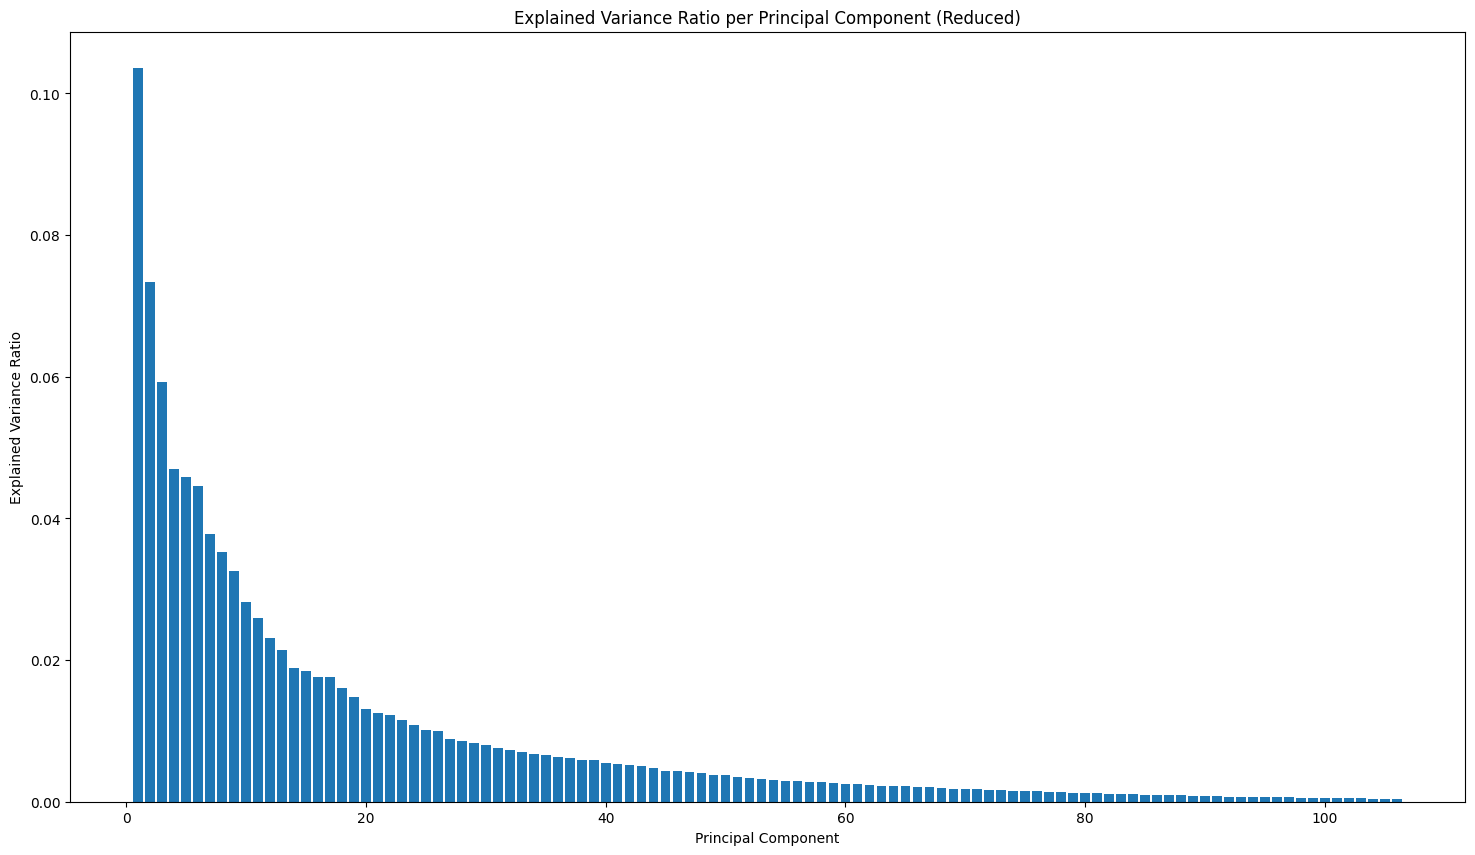


Reduced Train feature matrix shape: (28040, 106)
Reduced valid feature matrix shape: (750, 106)
Reduced test feature matrix shape: (750, 106)


In [ ]:
variance_threshold = 0.99

# Apply PCA
pca = PCA(n_components=variance_threshold, svd_solver='full')

pca_train_result = pca.fit_transform(standardized_train_features)
pca_valid_result = pca.transform(standardized_valid_features)
pca_test_result = pca.transform(standardized_test_features)

# Explained variance ratio after dimensionality reduction
explained_variance_ratio_reduced = pca.explained_variance_ratio_

# Plot explained variance ratio
plt.figure(figsize=(18, 10))
plt.bar(range(1, pca_train_result.shape[1] + 1), explained_variance_ratio_reduced)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio per Principal Component (Reduced)')
plt.show()

# Display the reduced feature matrix
print("\nReduced Train feature matrix shape: {}".format(pca_train_result.shape))
print("Reduced valid feature matrix shape: {}".format(pca_valid_result.shape))
print("Reduced test feature matrix shape: {}".format(pca_test_result.shape))

### Feature Selection

Visualize the distribution of the training label 1

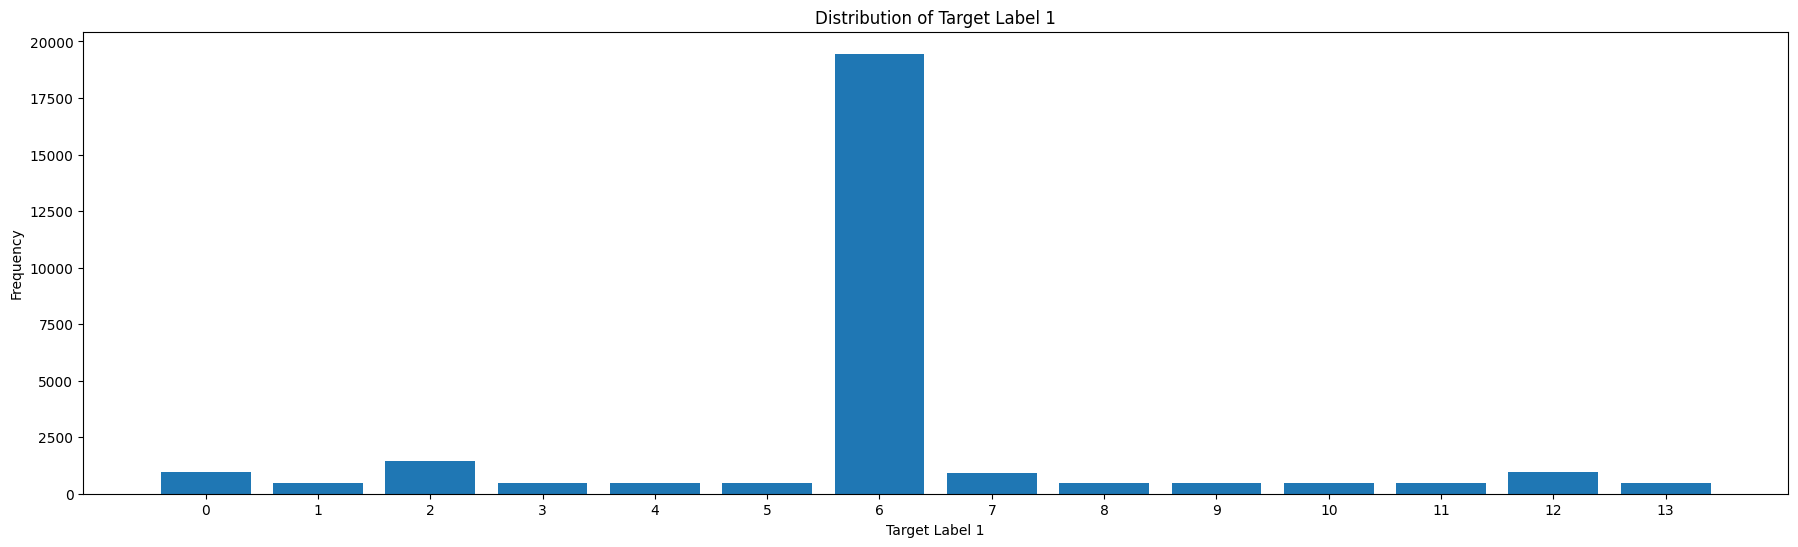

In [ ]:
labels, counts = np.unique(train_label4, return_counts=True)

plt.figure(figsize=(22, 6))
plt.xticks(labels)
plt.bar(labels, counts)
plt.xlabel('Target Label 1')
plt.ylabel('Frequency')
plt.title('Distribution of Target Label 1')
plt.show()

In [ ]:
pca_train_result_df = pd.DataFrame(pca_train_result)
pca_valid_result_df = pd.DataFrame(pca_valid_result)
pca_test_result_df = pd.DataFrame(pca_test_result)

Calculate the correlation matrix of the reduced training data features using PCA

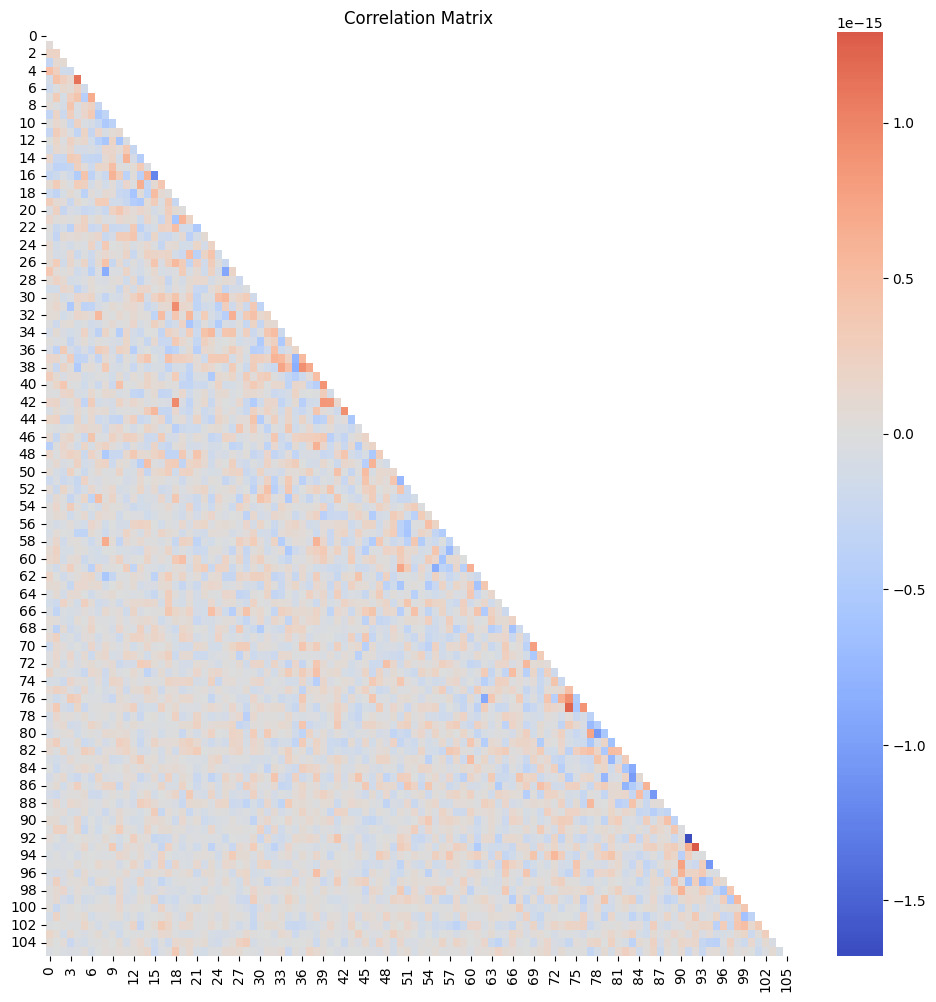

In [ ]:
#Calculate the correlation matrix

correlation_matrix = pca_train_result_df.corr()

mask = np.triu(np.ones_like(correlation_matrix))

# Create a heatmap of the correlation matrix using seaborn
plt.figure(figsize=(12, 12))
sns.heatmap(correlation_matrix, cmap='coolwarm', center=0, mask=mask)
plt.title("Correlation Matrix")
plt.show()

Identify the features that are highly correlated with each other using the PCA reduced traning dataset.

In [ ]:
# Set the threshold for correlation
correlation_threshold = 0.5

highly_correlated = set()

# Find highly correlated features
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > correlation_threshold:
            colname = correlation_matrix.columns[i]
            highly_correlated.add(colname)

print(highly_correlated)

set()


Remove the previously identified highly correlated features from all the datasets

In [ ]:
# Remove highly correlated features
train_features = pca_train_result_df.drop(columns=highly_correlated)
valid_features = pca_valid_result_df.drop(columns=highly_correlated)
test_features = pca_test_result_df.drop(columns=highly_correlated)

Display the resulting feature shapes of the datasets

In [ ]:
# Display the filtered feature counts
print("Filtered train features: {}".format(train_features.shape))
print("Filtered valid features: {}".format(valid_features.shape))
print("Filtered test features: {}".format(test_features.shape))

Filtered train features: (28040, 106)
Filtered valid features: (750, 106)
Filtered test features: (750, 106)


Identify the features that are highly correlated with the label using the traning dataset

In [ ]:
# Calculate the correlation matrix between features and train_label4
correlation_with_target = pca_train_result_df.corrwith(train_label4)

# Set the correlation threshold
correlation_threshold = 0.03

# Select features that meet the correlation threshold
highly_correlated_features = correlation_with_target[correlation_with_target.abs() > correlation_threshold]

print("Number of features :", highly_correlated_features.shape[0])

Number of features : 43


Extract the features that are only highly correlated with the label from all datasets

In [ ]:
# Drop the features with low correlated in train data
train_features = train_features[highly_correlated_features.index]

# Drop the features with low correlated in valid data
valid_features = valid_features[highly_correlated_features.index]

# Drop the features with low correlated in test data
test_features = test_features[highly_correlated_features.index]

Display the resulting feature shapes of the datasets

In [ ]:
# Display the filtered train feature count
print("Filtered train features: {}".format(train_features.shape))

# Display the filtered valid feature count
print("Filtered valid features: {}".format(valid_features.shape))

# Display the filtered test feature count
print("Filtered test features: {}".format(test_features.shape))

Filtered train features: (28040, 43)
Filtered valid features: (750, 43)
Filtered test features: (750, 43)


## Model Selection

Used models for the evaluation

In [ ]:
classification_models = [
    ('K Neighbors', KNeighborsClassifier()),
    # ('Decision Tree', DecisionTreeClassifier()),
    # ('Random Forest', RandomForestClassifier()),
    # ('XGBoost', XGBClassifier()),
    # ('SVM', SVC())
]

Select the model that best predicts the valid and test datasets based on accuracy, precision and recall

In [ ]:
# Number of features used in PCA
print(f"Number of features: {train_features.shape[1]}\n")

# Train and evaluate each classification model
for model_name, model in classification_models:
    # Train the model on the training data
    model.fit(train_features, train_label4)

    # Predict on the train data
    y_pred_train = model.predict(train_features)

    # Calculate metrics for classification evaluation
    accuracy = accuracy_score(train_label4, y_pred_train)
    precision = precision_score(train_label4, y_pred_train, average='weighted' , zero_division=1)
    recall = recall_score(train_label4, y_pred_train, average='weighted')

    print(f"Metrics for {model_name} on train data:")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print("\n")

    # Predict on the validation data
    y_pred_valid = model.predict(valid_features)

    # Calculate metrics for classification evaluation on validation data
    accuracy = accuracy_score(valid_label4, y_pred_valid)
    precision = precision_score(valid_label4, y_pred_valid, average='weighted', zero_division=1)
    recall = recall_score(valid_label4, y_pred_valid, average='weighted')

    print(f"Metrics for {model_name} on validation data:")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print("\n")

    # Predict on the test data
    y_pred_test = model.predict(test_features)

Number of features: 43

Metrics for K Neighbors on train data:
Accuracy: 0.98
Precision: 0.98
Recall: 0.98


Metrics for K Neighbors on validation data:
Accuracy: 0.97
Precision: 0.97
Recall: 0.97




# Generate Output CSV

Define method to create the csv file and create the CSV

In [ ]:
def create_csv(features, pred_before_fe, pred_after_fe, destination):
  feature_count = features.shape[1]

  header_row = [f"new_feature_{i}" for i in range(1,feature_count+1)]

  df = pd.DataFrame(features, columns  = header_row)

  df.insert(loc=0, column='Predicted labels before feature engineering', value=pred_before_fe)
  df.insert(loc=1, column='Predicted labels after feature engineering', value=pred_after_fe)
  df.insert(loc=2, column='No of new features', value=np.repeat(feature_count, features.shape[0]))

  df.to_csv(destination, index=False)

destination = '/content/drive/MyDrive/AI-Resources/ML/LAB01/190507U_label_4.csv'

# create the csv output file
create_csv(test_features.values, y_pred_base_test, y_pred_test, destination)